In [264]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('amazon-orders.csv')

"""
Below was used to exclude certain columns to protect pivacy (addresses,etc)
ended up just deleting manually, but will keep this just for documentation:

del_selection = df.iloc[:, 1:19]
df.drop(del_selection, axis=1, inplace=True)
"""

df.head()

,Order Date,Tax Charged,Total Charged
0,08/30/14,$0.00,$38.78
1,08/30/14,$1.06,$15.85
2,08/30/14,$1.73,$25.82
3,12/13/14,$1.34,$31.33
4,12/13/14,$0.00,$16.95


In [244]:
# "Clean" the data; remove currency symbol, and convert to float
df["Total Charged"] = df["Total Charged"].astype(str).str.replace('$', '').astype(float)
df.head()

,Order Date,Tax Charged,Total Charged
0,08/30/14,$0.00,38.78
1,08/30/14,$1.06,15.85
2,08/30/14,$1.73,25.82
3,12/13/14,$1.34,31.33
4,12/13/14,$0.00,16.95


In [245]:
# "Clean" the data; remove currency symbol, and convert to float
df["Tax Charged"] = df["Tax Charged"].astype(str).str.replace('$', '').astype(float)
df.head()

,Order Date,Tax Charged,Total Charged
0,08/30/14,0.00,38.78
1,08/30/14,1.06,15.85
2,08/30/14,1.73,25.82
3,12/13/14,1.34,31.33
4,12/13/14,0.00,16.95


In [246]:
# Overall tax rate
df["Tax Charged"].sum() / df["Total Charged"].sum()

0.017142672948080657

In [247]:
df["Total Charged"].sum()

10237.61

In [248]:
df["Total Charged"].mean()

104.46540816326528

In [249]:
df["Total Charged"].median()

30.115

In [250]:
df["Total Charged"].max()

1716.5

In [251]:
df["Total Charged"].min()

3.95

In [252]:
df["Tax Charged"].sum()

175.50000000000003

<AxesSubplot:xlabel='Order Date'>

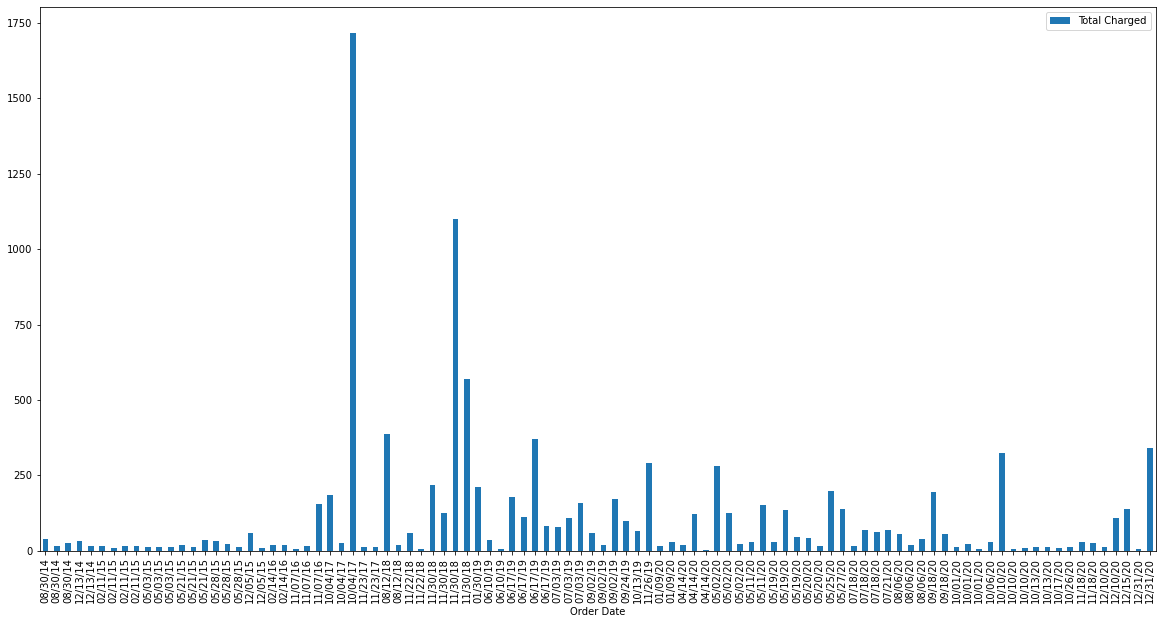

In [253]:
# Intial plot; very unpleasant to read, so reformatting will be necessary
df.plot.bar(x = 'Order Date', y = 'Total Charged', rot=90, figsize=(20,10))

In [262]:
# Convert current date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Each order is displayed as a separate entry, rather than together by orders per day
# So, group all by order date with total charged being the total charged on that day
daily_orders = df.groupby('Order Date').sum()["Total Charged"]
daily_orders.head()






Order Date
2014-08-30    80.45
2014-12-13    48.28
2015-02-11    55.97
2015-05-03    36.71
2015-05-21    68.13
Name: Total Charged, dtype: float64

<AxesSubplot:title={'center':'Amazon Shopping Data'}, xlabel='Order Date', ylabel='Total Cost ($)'>

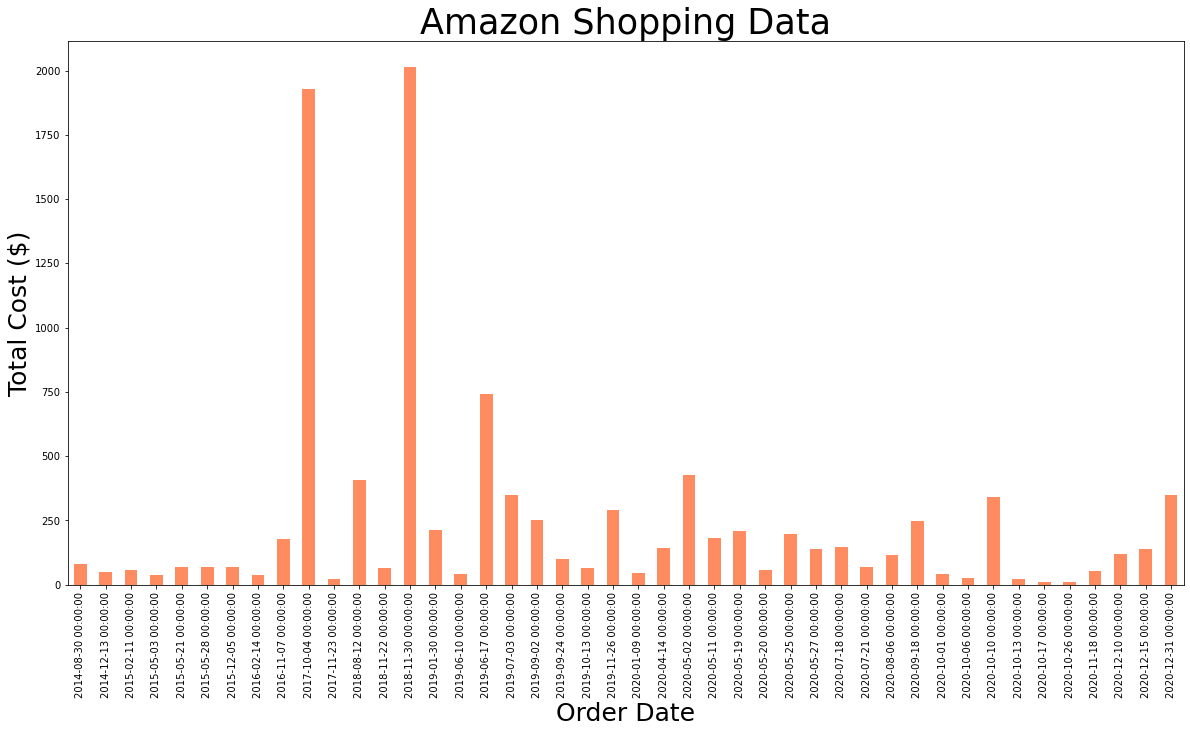

In [276]:
# Plot graph
plt.title('Amazon Shopping Data', fontsize=35)
plt.xlabel('Order Date', fontsize=25)
plt.ylabel('Total Cost ($)', fontsize=25)

daily_orders.plot.bar(figsize=(20,10), color='#ff8b61')
